In [1]:
# torch.save(influences_collections, "influences_collections-100.tmp.pt")
import torch
from graph_tool.draw import graph_draw
from experiments.visualization import get_graph
mnli2_influences_collections = torch.load("/export/home/Experiments/20200805/mnli2_influences-100.pt")
hans_influences_collections = torch.load("/export/home/Experiments/20200805/hans_influences-100.pt")
for L in hans_influences_collections:
    for key, val in L.items():
        L[key] = val * 100

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [2]:
g = get_graph(500, mnli2_influences_collections, hans_influences_collections)

100%|██████████| 96525/96525 [00:07<00:00, 13249.77it/s]


In [3]:
import matplotlib.cm as plt_cm

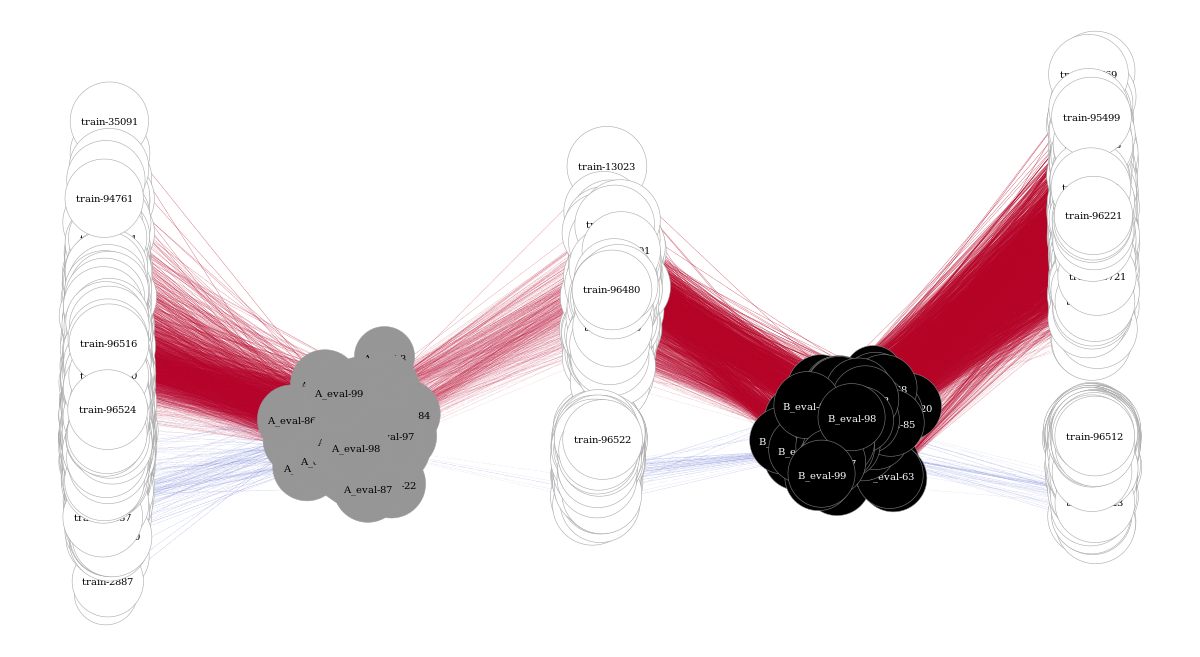

In [4]:
def plot(g):
    graph_draw(g,
               pos=g.vertex_properties["positions"],
               edge_color=g.edge_properties["colors"],
               vertex_size=g.vertex_properties["sizes"],
               vertex_fill_color=g.vertex_properties["colors"],
               vcmap=plt_cm.Greys,
               ecmap=plt_cm.coolwarm_r,
               edge_pen_width=g.edge_properties["weights"],
               vertex_text=g.vertex_properties["data_indices"],
               vertex_font_size=5,
               # output="20200806-1.png"
    )
plot(g)

In [5]:
from tqdm import tqdm
import numpy as np

In [6]:
# arr = np.array([g.vertex_properties["layout"][i] for i in range(72524)])

In [7]:
# for e in g.edges():
#     break

In [8]:
# sum([g.edge_properties["weights"][e] <.0001 for e in g.edges()])

In [9]:
from experiments.visualization import *
tokenizer, model = create_tokenizer_and_model(
    MNLI2_MODEL_PATH)

train_dataset, _ = create_datasets(
    task_name="mnli-2",
    tokenizer=tokenizer)

Params Trainable: 14767874
	bert.encoder.layer.10.attention.self.query.weight
	bert.encoder.layer.10.attention.self.query.bias
	bert.encoder.layer.10.attention.self.key.weight
	bert.encoder.layer.10.attention.self.key.bias
	bert.encoder.layer.10.attention.self.value.weight
	bert.encoder.layer.10.attention.self.value.bias
	bert.encoder.layer.10.attention.output.dense.weight
	bert.encoder.layer.10.attention.output.dense.bias
	bert.encoder.layer.10.attention.output.LayerNorm.weight
	bert.encoder.layer.10.attention.output.LayerNorm.bias
	bert.encoder.layer.10.intermediate.dense.weight
	bert.encoder.layer.10.intermediate.dense.bias
	bert.encoder.layer.10.output.dense.weight
	bert.encoder.layer.10.output.dense.bias
	bert.encoder.layer.10.output.LayerNorm.weight
	bert.encoder.layer.10.output.LayerNorm.bias
	bert.encoder.layer.11.attention.self.query.weight
	bert.encoder.layer.11.attention.self.query.bias
	bert.encoder.layer.11.attention.self.key.weight
	bert.encoder.layer.11.attention.self.ke

In [10]:
def visualize_one_example(string):
    index = int(string.split("-")[1])
    X = tokenizer.decode(train_dataset[index].input_ids)
    Y = train_dataset.label_list[train_dataset[index].label]
    premise, hypothesis = X.split("[CLS]")[1].split("[SEP]")[:2]
    print(f"#{index}\n\tP: {premise.strip()}\n\tH: {hypothesis.strip()}\n\tL: {Y}")

In [20]:
edge_influences = g.edge_properties["signed_influences"]
vertex_data_indices = g.vertex_properties["data_indices"]
for i, v in enumerate(g.vertices()):
    # Two types of targets
    # two types of connections
#     if i > 3:
#         break
#     print([e.target() for e in v.all_edges()])
    A_influences = []
    B_influences = []
    for e in v.all_edges():
        target = e.target()
        if g.vertex_properties["colors"][target] == 2:
            A_influences.append(edge_influences[e])
        else:
            B_influences.append(edge_influences[e])
    
    if len(A_influences) != 0 and len(B_influences) != 0:
        if np.sign(np.mean(A_influences)) != np.sign(np.mean(B_influences)):
            visualize_one_example(vertex_data_indices[v])
            # print(f"{[vertex_data_indices[e.target()] for e in v.all_edges()]}, {np.mean(A_influences):.5f}, {np.mean(B_influences):.5f}")
            print(f"MNLI: {np.mean(A_influences):.5f}, HANS:{np.mean(B_influences):.5f}")

#231
	P: Automobile includes small trucks.
	H: Small trucks are not great automobiles.
	L: non_entailment
MNLI: -0.00007, HANS:0.01994
#29773
	P: Sit down in that armchair, and tell me the whole story with as few fancy turns of speech as possible. " Mr. Hersheimmer obeyed.
	H: Mr. Hersheimmer, when asked, refused to seat himself in the armchair or divulge any information.
	L: non_entailment
MNLI: -0.00029, HANS:0.01740
#32393
	P: Doors were banging.
	H: The doors were opening.
	L: non_entailment
MNLI: -0.00033, HANS:0.02031
#50889
	P: oh i'm in my paperwork here that's what i do when i wait for a phone call i get in my paperwork
	H: I never do my paperwork when waiting on a phone call.
	L: non_entailment
MNLI: 0.00128, HANS:-0.08200
#51025
	P: yeah yeah like Hal yeah
	H: No, not like Hal.
	L: non_entailment
MNLI: -0.00061, HANS:0.01381
#56768
	P: no i don't i did it by hand uh - huh it wasn't too much of a job really like i say it's just
	H: It's too much work to do by hand.
	L: non_en

In [146]:
# %%time
# from graph_tool.all import collection, minimize_nested_blockmodel_dl
# # g = collection.data["celegansneural"]
# helpful_state = minimize_nested_blockmodel_dl(helpful_g, deg_corr=False)
# harmful_state = minimize_nested_blockmodel_dl(harmful_g, deg_corr=False)

# draw_hierarchy(
#     helpful_state,
# #     layout="sfdp",
#     edge_pen_width=1.,
#     edge_color=helpful_g.edge_properties["colors"],
#     vertex_pen_width=1.,
#     vertex_size=helpful_g.vertex_properties["sizes"],
#     vertex_fill_color=helpful_g.vertex_properties["colors"],
#     rel_order=harmful_g.vertex_properties["relorders"],
#     vcmap=plt_cm.Greys,
#     ecmap=plt_cm.coolwarm)

In [9]:
# %%time
# from graph_tool.all import collection, minimize_nested_blockmodel_dl
# # g = collection.data["celegansneural"]
# helpful_state = minimize_nested_blockmodel_dl(helpful_g, deg_corr=False)
# harmful_state = minimize_nested_blockmodel_dl(harmful_g, deg_corr=False)

# draw_hierarchy(
#     helpful_state,
# #     layout="sfdp",
#     edge_pen_width=1.,
#     edge_color=helpful_g.edge_properties["colors"],
#     vertex_pen_width=1.,
#     vertex_size=helpful_g.vertex_properties["sizes"],
#     vertex_fill_color=helpful_g.vertex_properties["colors"],
#     rel_order=harmful_g.vertex_properties["relorders"],
#     vcmap=plt_cm.Greys,
#     ecmap=plt_cm.coolwarm)

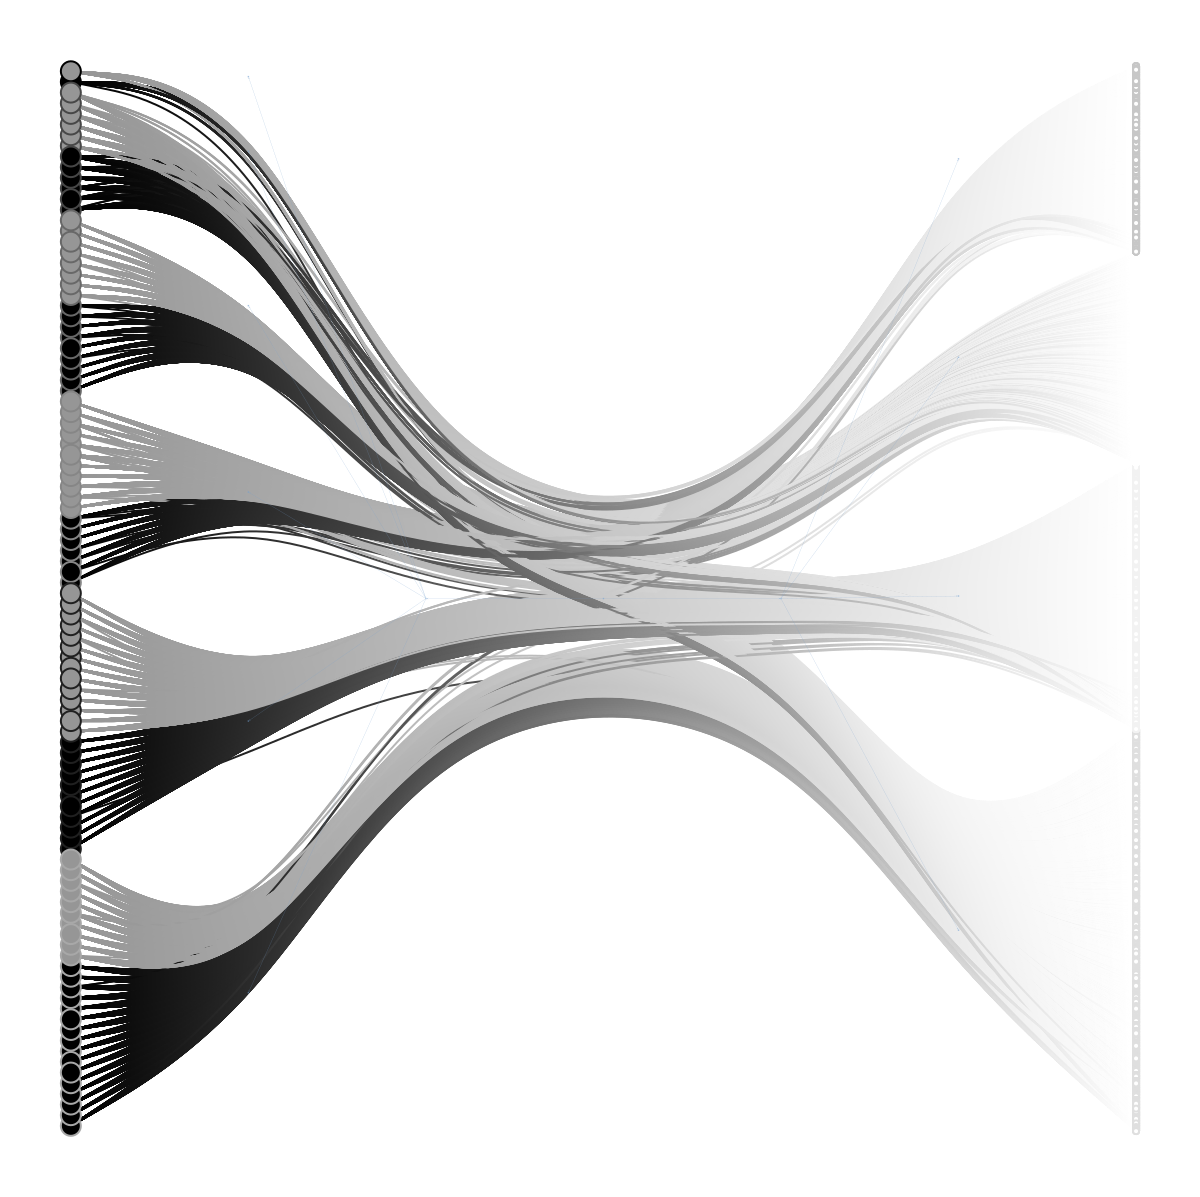

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f8ff7b5f350, at 0x7f8ff68d8590>,
 <Graph object, directed, with 18334 vertices and 18333 edges, at 0x7f900450d090>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f900450d090, at 0x7f9004537590>)

In [274]:
draw_hierarchy(
    harmful_state,
    layout="bipartite",
    edge_pen_width=1.,
    edge_color=harmful_g.edge_properties["colors"],
    vertex_pen_width=1.,
    vertex_size=harmful_g.vertex_properties["sizes"],
    vertex_fill_color=harmful_g.vertex_properties["colors"],
    vcmap=plt_cm.Greys,
    ecmap=plt_cm.coolwarm,
    rel_order=harmful_g.vertex_properties["relorders"])

In [211]:
# # g = gt.GraphView(g, vfilt=gt.label_largest_component(g))
# # g.purge_vertices()
# state = gt.minimize_nested_blockmodel_dl(g, deg_corr=False)
# t = gt.get_hierarchy_tree(state)[0]

# v_rel_order = t.new_vertex_property("int")
# for vertex in t.vertices():
#     val = np.mean([e_colors[edge] for edge in vertex.out_edges()])
#     val = val if not np.isnan(val) else 0
#     v_rel_order[vertex] = val
    
# t.vertex_properties["X"] = v_rel_order


# tpos = pos = gt.radial_tree_layout(t, t.vertex(t.num_vertices() - 1), rel_order=t.vertex_properties["X"], weighted=True)
# cts = gt.get_hierarchy_control_points(g, t, tpos)
# pos = g.own_property(tpos)

# graph_draw(g,
#            pos=pos,
#            edge_color=g.edge_properties["colors"],
#            vertex_size=g.vertex_properties["sizes"],
#            vertex_fill_color=g.vertex_properties["colors"],
#            vcmap=plt_cm.Greys,
#            ecmap=plt_cm.coolwarm,
#            edge_control_points=cts,
# )

In [212]:
# vertex.out_edges()

In [213]:
# v_rel_order = t.new_vertex_property("int")
# for vertex in t.vertices():
#     val = np.mean([e_colors[edge] for edge in vertex.out_edges()])
#     val = val if not np.isnan(val) else 0
#     print(val, end=" ")
#     v_rel_order[vertex] = val

In [203]:
t, g

(<Graph object, directed, with 2071 vertices and 2070 edges, at 0x7f8ff7112610>,
 <Graph object, directed, with 2068 vertices and 2000 edges, 3 internal vertex properties, 1 internal edge property, at 0x7f8ff7e9f690>)

In [160]:
# import graph_tool.all as gt
# # g = gt.collection.data["netscience"]
# g = gt.GraphView(g, vfilt=gt.label_largest_component(g))
# g.purge_vertices()
# state = gt.minimize_nested_blockmodel_dl(g, deg_corr=True)
# t = gt.get_hierarchy_tree(state)[0]
# tpos = pos = gt.radial_tree_layout(t, t.vertex(t.num_vertices() - 1), weighted=True)
# cts = gt.get_hierarchy_control_points(g, t, tpos)
# pos = g.own_property(tpos)
# b = state.levels[0].b
# shape = b.copy()
# shape.a %= 14
# gt.graph_draw(g, pos=pos, vertex_fill_color=b, vertex_shape=shape, edge_control_points=cts,
#               edge_color=[0, 0, 0, 0.3], vertex_anchor=0)

In [161]:
# import graph_tool.all as gt
# g = gt.collection.data["netscience"]
# g = gt.GraphView(g, vfilt=gt.label_largest_component(g))
# g.purge_vertices()
# state = gt.minimize_nested_blockmodel_dl(g, deg_corr=True)
# t = gt.get_hierarchy_tree(state)[0]
# tpos = pos = gt.radial_tree_layout(t, t.vertex(t.num_vertices() - 1), weighted=True)
# cts = gt.get_hierarchy_control_points(g, t, tpos)
# pos = g.own_property(tpos)
# b = state.levels[0].b
# shape = b.copy()
# shape.a %= 14
# gt.graph_draw(g, pos=pos, vertex_fill_color=b, vertex_shape=shape, edge_control_points=cts,
#               edge_color=[0, 0, 0, 0.3], vertex_anchor=0)

In [1]:
import torch
from tqdm import tqdm
from influence_utils import faiss_utils
from influence_utils import nn_influence_utils
from experiments.mnli import (
    WEIGHT_DECAY,
    compute_BERT_CLS_feature)
from experiments.mnli_utils import (
    MNLI2_MODEL_PATH,
    predict,
    get_dataloader,
    create_datasets,
    create_tokenizer_and_model)
from transformers import Trainer, TrainingArguments

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [2]:
train_task_name = "mnli-2"
eval_task_name = "mnli-2"

In [3]:
if train_task_name not in ["mnli-2", "hans"]:
    raise ValueError

if eval_task_name not in ["mnli-2", "hans"]:
    raise ValueError

tokenizer, model = create_tokenizer_and_model(
    MNLI2_MODEL_PATH)

train_dataset, _ = create_datasets(
    task_name=train_task_name,
    tokenizer=tokenizer)

_, eval_dataset = create_datasets(
    task_name=eval_task_name,
    tokenizer=tokenizer)

faiss_index = faiss_utils.FAISSIndex(768, "Flat")

Params Trainable: 14767874
	bert.encoder.layer.10.attention.self.query.weight
	bert.encoder.layer.10.attention.self.query.bias
	bert.encoder.layer.10.attention.self.key.weight
	bert.encoder.layer.10.attention.self.key.bias
	bert.encoder.layer.10.attention.self.value.weight
	bert.encoder.layer.10.attention.self.value.bias
	bert.encoder.layer.10.attention.output.dense.weight
	bert.encoder.layer.10.attention.output.dense.bias
	bert.encoder.layer.10.attention.output.LayerNorm.weight
	bert.encoder.layer.10.attention.output.LayerNorm.bias
	bert.encoder.layer.10.intermediate.dense.weight
	bert.encoder.layer.10.intermediate.dense.bias
	bert.encoder.layer.10.output.dense.weight
	bert.encoder.layer.10.output.dense.bias
	bert.encoder.layer.10.output.LayerNorm.weight
	bert.encoder.layer.10.output.LayerNorm.bias
	bert.encoder.layer.11.attention.self.query.weight
	bert.encoder.layer.11.attention.self.query.bias
	bert.encoder.layer.11.attention.self.key.weight
	bert.encoder.layer.11.attention.self.ke

In [4]:
model.cuda()
device = model.device
train_batch_data_loader = get_dataloader(
    dataset=train_dataset,
    batch_size=128,
    random=False)

In [7]:
for inputs in tqdm(train_batch_data_loader):
    for k, v in inputs.items():
        inputs[k] = v.to(device)
    features = compute_BERT_CLS_feature(model, **inputs)
    features = features.cpu().detach().numpy()
    faiss_index.add(features)